In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plumed

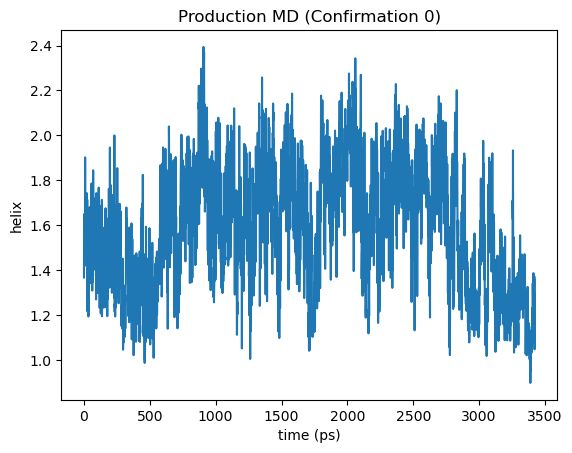

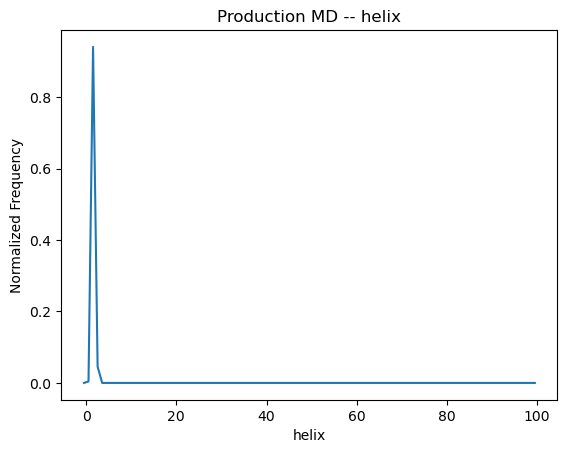

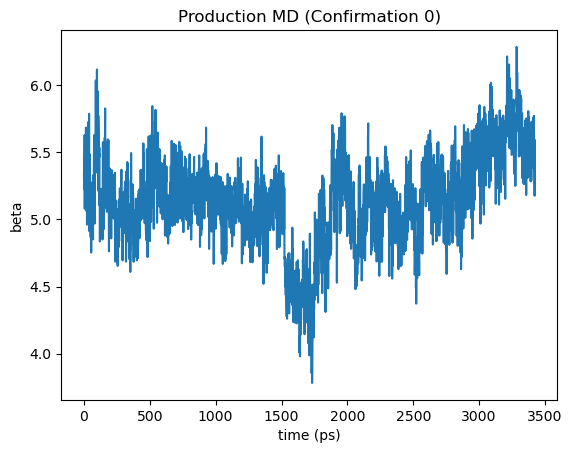

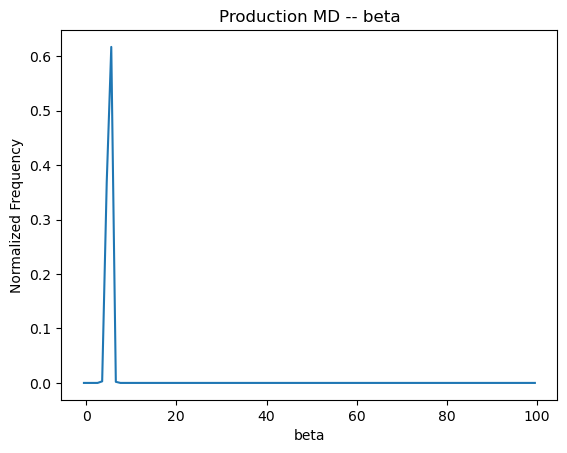

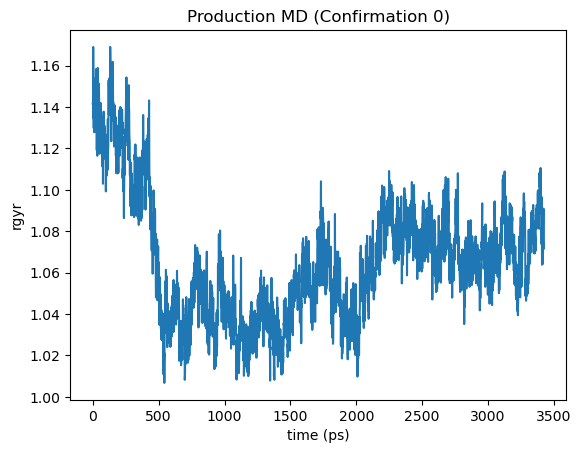

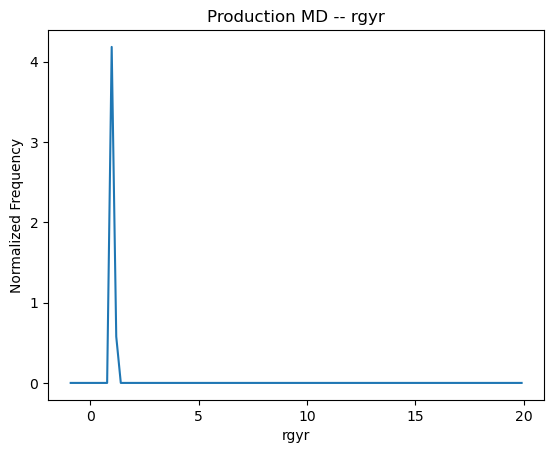

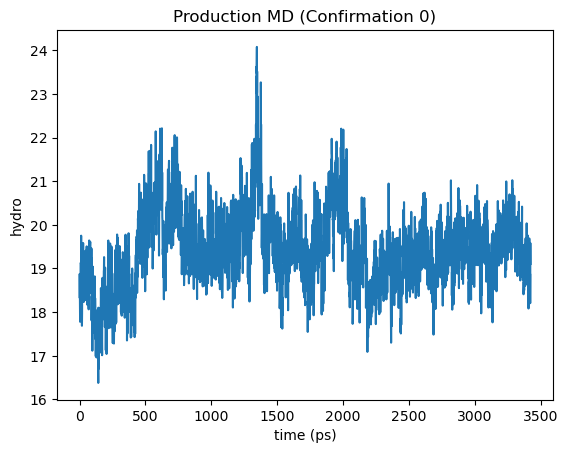

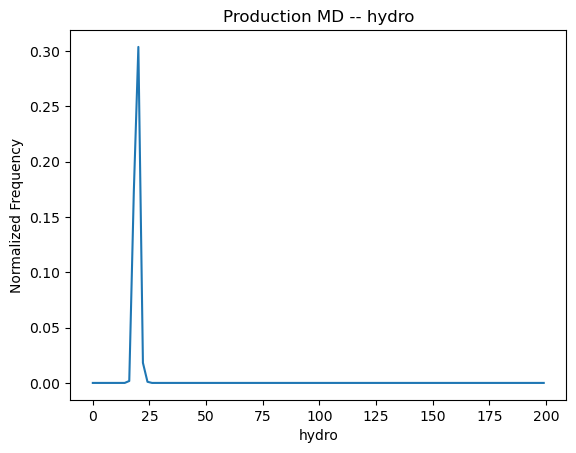

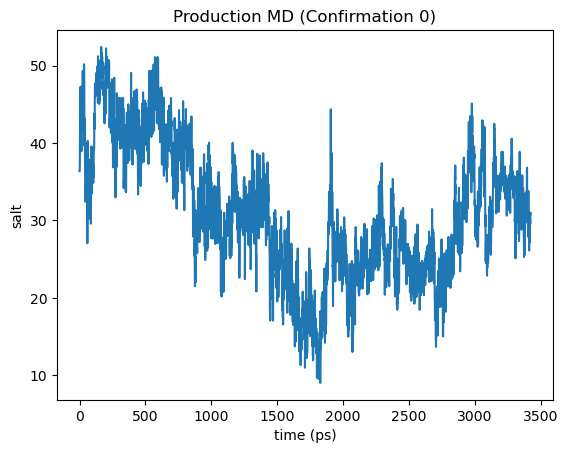

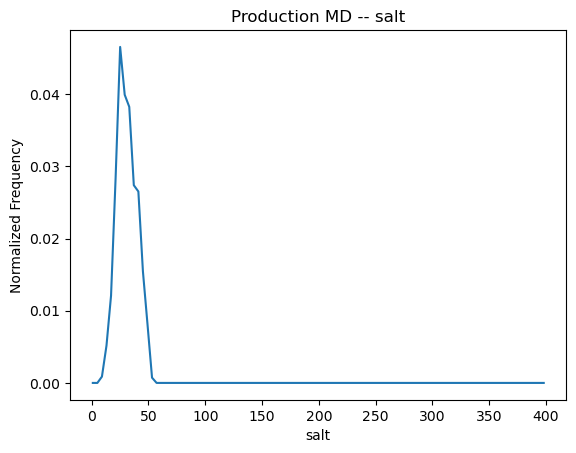

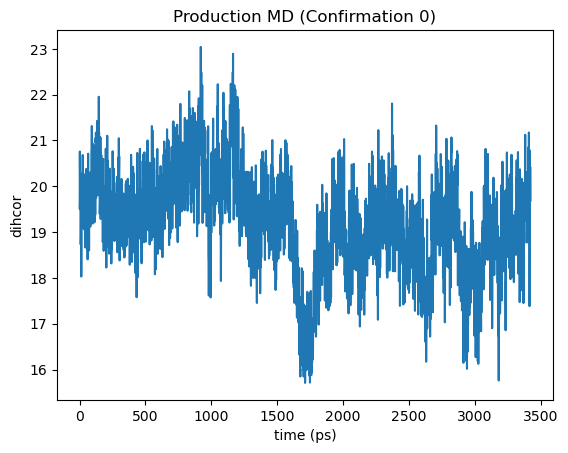

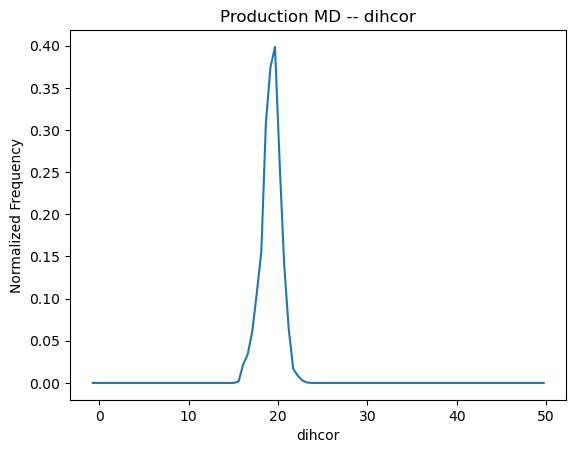

In [4]:
colvar_list = ["time", "helix", "beta", "rgyr", "hydro", "salt", "dihcor", "bias"]
colvar_max_values = [0, 100, 100, 20, 200, 400, 50]
for i in range(1, 7):
    
    data = pd.read_table(f"../system/simulations/confirmation0/COLVAR.0", delim_whitespace=True, skiprows=1, header=None)
    time = data[0]
    colvar_values = data[i]    
    fig, ax = plt.subplots()
    ax.plot(time, colvar_values)
    ax.set_xlabel("time (ps)")  # Add an x-label to the axes.
    ax.set_ylabel(f"{colvar_list[i]}")  # Add a y-label to the axes.
    ax.set_title(f"Production MD (Confirmation 0)")
    
    
    data = pd.read_table(f"../system/simulations/confirmation0/COLVAR.0", delim_whitespace=True, skiprows=1, header=None)
    probability,xedges=np.histogram(data[i], bins=100,range=[-1, colvar_max_values[i]],density=True,weights=None)
    xcenters= xedges[:-1] + np.diff(xedges)/2
    fig, ax = plt.subplots()
    ax.plot(xcenters, probability, label=f"helix values - confirmation {i}")
    ax.set_xlabel(f"{colvar_list[i]}")  # Add an x-label to the axes.
    ax.set_ylabel("Normalized Frequency")  # Add a y-label to the axes.
    ax.set_title(f"Production MD -- {colvar_list[i]}")
    

Text(0.5, 1.0, 'Production MD (Confirmation 0)')

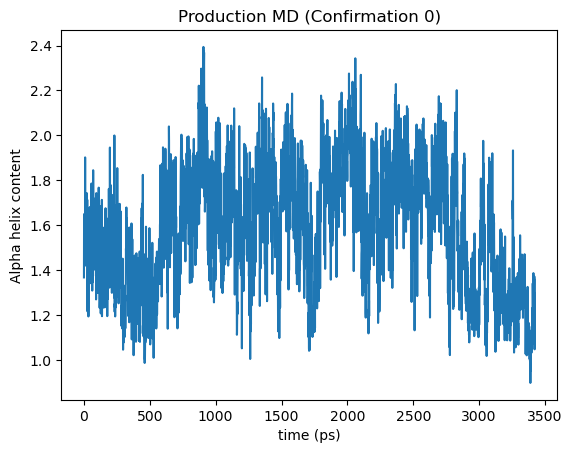

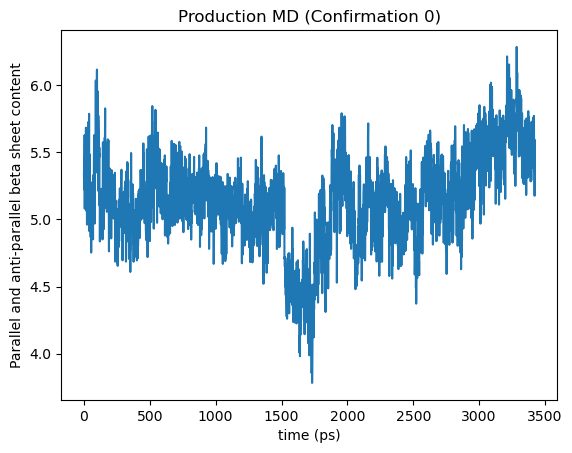

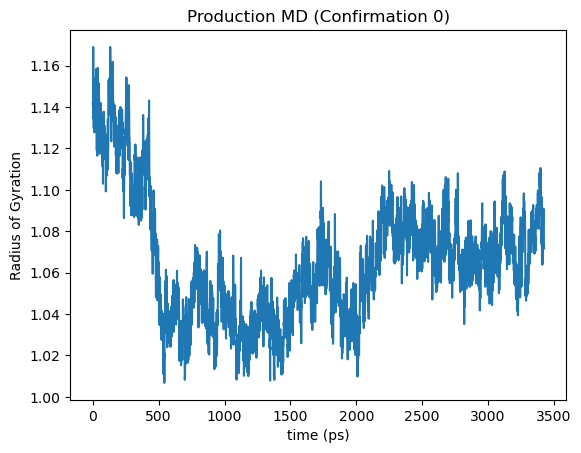

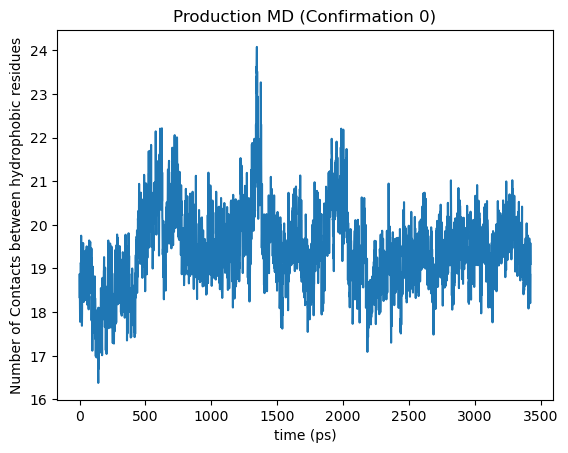

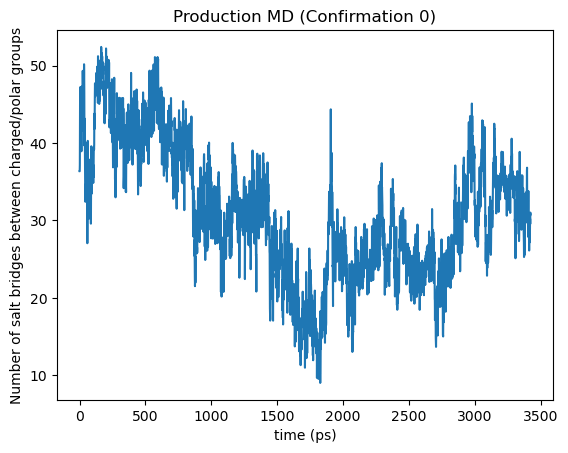

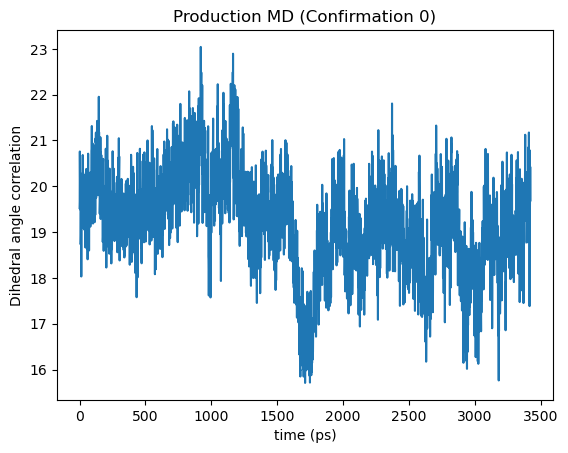

In [79]:
data = pd.read_table(f"../system/simulations/confirmation0/COLVAR.0", delim_whitespace=True, skiprows=1, header=None)
time = data[0]
helix = data[1]
beta = data[2]
rgyr = data[3]
hydro = data[4]
salt = data[5]
dihcor = data[6]
bias = data[7]
    
fig, ax = plt.subplots()
ax.plot(time, helix)
ax.set_xlabel("time (ps)")  # Add an x-label to the axes.
ax.set_ylabel("Alpha helix content")  # Add a y-label to the axes.
ax.set_title("Production MD (Confirmation 0)")
# ax.legend()

fig, ax = plt.subplots()
ax.plot(time, beta)
ax.set_xlabel("time (ps)")  # Add an x-label to the axes.
ax.set_ylabel("Parallel and anti-parallel beta sheet content")  # Add a y-label to the axes.
ax.set_title("Production MD (Confirmation 0)")
# ax.legend()

fig, ax = plt.subplots()
ax.plot(time, rgyr)
ax.set_xlabel("time (ps)")  # Add an x-label to the axes.
ax.set_ylabel("Radius of Gyration")  # Add a y-label to the axes.
ax.set_title("Production MD (Confirmation 0)")
# ax.legend()

fig, ax = plt.subplots()
ax.plot(time, hydro)
ax.set_xlabel("time (ps)")  # Add an x-label to the axes.
ax.set_ylabel("Number of Contacts between hydrophobic residues")  # Add a y-label to the axes.
ax.set_title("Production MD (Confirmation 0)")
# ax.legend()

fig, ax = plt.subplots()
ax.plot(time, salt)
ax.set_xlabel("time (ps)")  # Add an x-label to the axes.
ax.set_ylabel("Number of salt bridges between charged/polar groups")  # Add a y-label to the axes.
ax.set_title("Production MD (Confirmation 0)")
# ax.legend()

fig, ax = plt.subplots()
ax.plot(time, dihcor)
ax.set_xlabel("time (ps)")  # Add an x-label to the axes.
ax.set_ylabel("Dihedral angle correlation")  # Add a y-label to the axes.
ax.set_title("Production MD (Confirmation 0)")
# ax.legend()

<br>

## Correcting the colvar files for continuity (after restarting a simulation, plumed does not rewrite the colvar values from the last checkpoint but appends the file)

<br>

In [4]:
def get_column_headings(path):
    column_headings = []
    with open(path, 'r') as stats_file:
        for row in stats_file:
            row = row.strip().split(' ')
            if row[0] == '#!':
                for i in range(2, len(row)):
                    column_headings.append(row[i])
            else:
                break
    return column_headings

In [20]:
for i in range(0, 48):
    column_headings = get_column_headings(f"../system/simulations/confirmation{i}/COLVAR.{i}")
    with open(f"../system/simulations/confirmation{i}/COLVAR.{i}", 'r') as dat_file:
        with open(f"../system/simulations/confirmation{i}/COLVAR.{i}.csv", 'w', newline='') as csv_file:
            dat_file_lines = dat_file.readlines()
            time_vals = []
            count = 0
            for j in range(len(dat_file_lines)):
                row = dat_file_lines[j].strip().split(' ')
                if row[0] == '#!':
                    if count == 0:
                        csv_file.write(",".join(column_headings)+"\n")
                        count += 1
                    else:
                        row2 = dat_file_lines[j+1].strip().split(' ')
                        time_vals.append(float(row2[0]))
                else: 
                    continue
#             print(time_vals)
            
            count = -1
            checkpoint_reached = False
            for j in range(len(dat_file_lines)):
                row = dat_file_lines[j].strip().split(' ')
                if row[0] == '#!':
                    if count == -1:
                        count += 1
                        continue
                    else:
                        checkpoint_reached = True
                        if len(time_vals) > (count+1):
                            count += 1
                        continue
                elif checkpoint_reached == False and int(float(row[0])) >= int(time_vals[count]):
                    continue
                elif (checkpoint_reached == True) | (checkpoint_reached == False and int(float(row[0])) < int(time_vals[count])):
                    processed_row = []
                    for element in row:
                        if element == '':
                            continue
                        else:
                            processed_row.append(element)
                    csv_file.write(','.join(processed_row) + '\n')
                else:
                    print("unknown error")
                    
                    

## Correcting for continuity in hills files

In [12]:
hills_file_names = ['helix', 'beta', 'rgyr', 'hydro', 'salt', 'dihcor']
flag = 0
for i in range(len(hills_file_names)):
    column_headings = get_column_headings(f"../system/simulations/confirmation0/HILLS_{hills_file_names[i]}")
    with open(f"../system/simulations/confirmation0/HILLS_{hills_file_names[i]}", 'r') as dat_file:
        with open(f"../system/simulations/confirmation0/HILLS2_{hills_file_names[i]}", 'w', newline='') as csv_file:
            dat_file_lines = dat_file.readlines()
            csv_file.write(dat_file_lines[0])
            count = 0
            for j in range(1, len(dat_file_lines)):
                if j == 161043:
                    flag = 1
                elif j == 164380:
                    flag = 0
                
                if flag == 1:
                    continue
                else: 
                    csv_file.write(dat_file_lines[j])
#             print(time_vals)

<br>

## The following graphs illustrate the six CV spaces explored by the 48 replicas and the overall bias potential associated with each CV

### Note: it seems to me that unknown means derivative

<br>

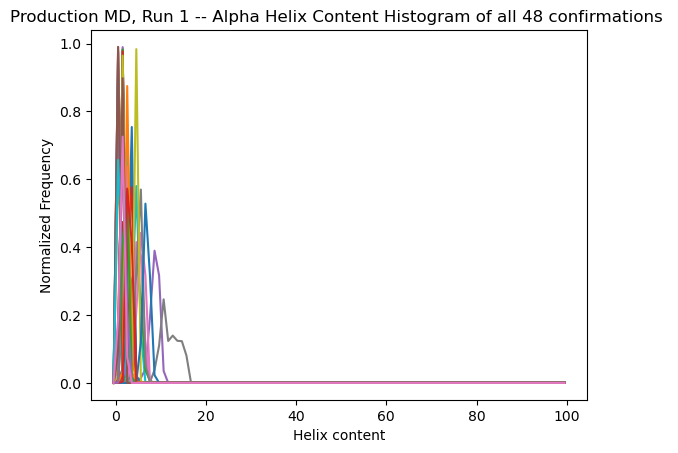

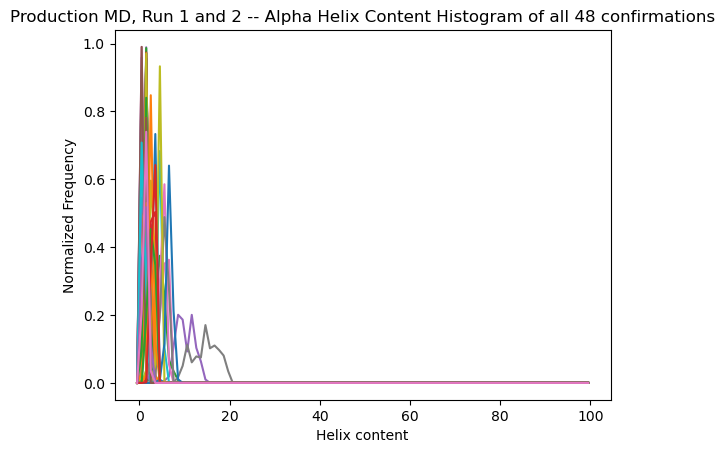

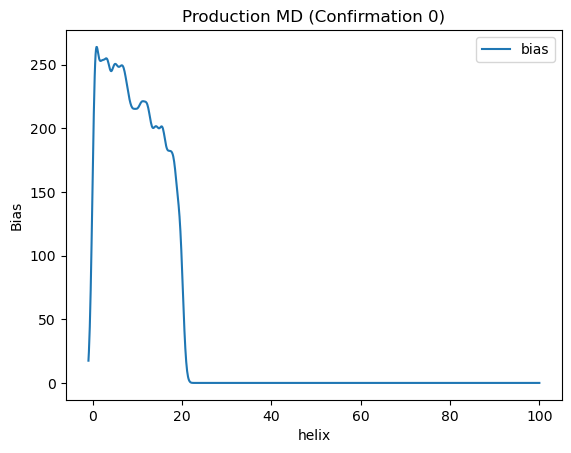

In [57]:
fig, ax = plt.subplots()
colvar_list = ["helix", "beta", "rgyr", "hydro", "salt", "dihcor", "bias"]
for i in range(47):
    data = pd.read_csv(f"../system/simulations/confirmation{i}/COLVAR.{i}.csv", engine="python", skipfooter=3988)

    probability,xedges=np.histogram(data["helix.lessthan"], bins=100,range=[-1, 100],density=True,weights=None)
    xcenters= xedges[:-1] + np.diff(xedges)/2
    ax.plot(xcenters, probability, label=f"helix values - confirmation {i}")
    # ax.plot(helix_values, unknown_qty, label="uknown")
    ax.set_xlabel("Helix content")  # Add an x-label to the axes.
    ax.set_ylabel("Normalized Frequency")  # Add a y-label to the axes.
    ax.set_title("Production MD, Run 1 -- Alpha Helix Content Histogram of all 48 confirmations ")
#     ax.legend()

fig, ax = plt.subplots()
for i in range(47):
    data = pd.read_csv(f"../system/simulations/confirmation{i}/COLVAR.{i}.csv")

    probability,xedges=np.histogram(data["helix.lessthan"], bins=100,range=[-1, 100],density=True,weights=None)
    xcenters= xedges[:-1] + np.diff(xedges)/2
    ax.plot(xcenters, probability, label=f"helix values - confirmation {i}")
    # ax.plot(helix_values, unknown_qty, label="uknown")
    ax.set_xlabel("Helix content")  # Add an x-label to the axes.
    ax.set_ylabel("Normalized Frequency")  # Add a y-label to the axes.
    ax.set_title("Production MD, Run 1 and 2 -- Alpha Helix Content Histogram of all 48 confirmations")
#     ax.legend()

data = pd.read_table("../system/simulations/confirmation0/GRID.helix.lessthan", delim_whitespace=True, skiprows=5, header=None)

values = data[0]
bias = data[1]

fig, ax = plt.subplots()
ax.plot(values, bias, label="bias")
ax.set_xlabel(f"helix")  # Add an x-label to the axes.
ax.set_ylabel("Bias")  # Add a y-label to the axes.
ax.set_title("Production MD (Confirmation 0)")
ax.legend()

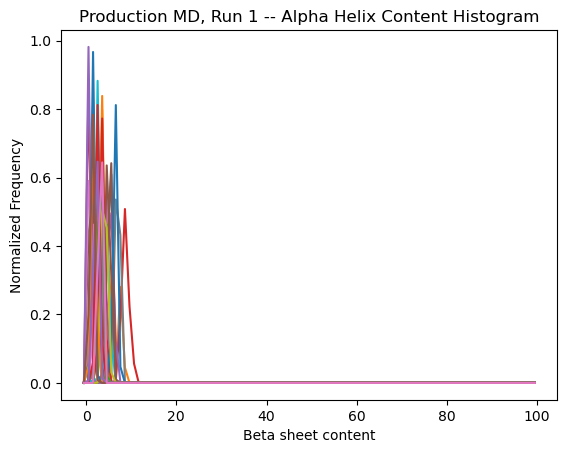

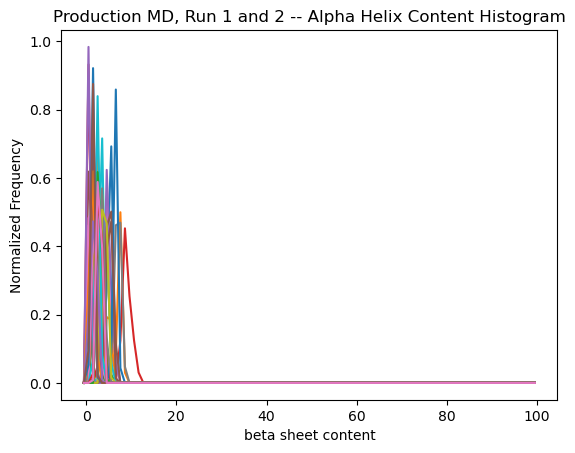

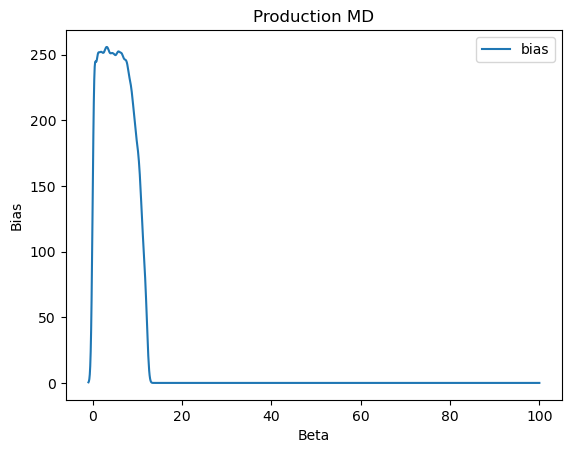

In [59]:
fig, ax = plt.subplots()
colvar_list = ["helix", "beta", "rgyr", "hydro", "salt", "dihcor", "bias"]
for i in range(47):
    data = pd.read_csv(f"../system/simulations/confirmation{i}/COLVAR.{i}.csv", engine="python", skipfooter=3988)

    probability,xedges=np.histogram(data["beta"], bins=100,range=[-1, 100],density=True,weights=None)
    xcenters= xedges[:-1] + np.diff(xedges)/2
    ax.plot(xcenters, probability, label=f"Beta colvar values - confirmation {i}")
    # ax.plot(helix_values, unknown_qty, label="uknown")
    ax.set_xlabel("Beta sheet content")  # Add an x-label to the axes.
    ax.set_ylabel("Normalized Frequency")  # Add a y-label to the axes.
    ax.set_title("Production MD, Run 1 -- Alpha Helix Content Histogram")
#     ax.legend()

fig, ax = plt.subplots()
for i in range(47):
    data = pd.read_csv(f"../system/simulations/confirmation{i}/COLVAR.{i}.csv")

    probability,xedges=np.histogram(data["beta"], bins=100,range=[-1, 100],density=True,weights=None)
    xcenters= xedges[:-1] + np.diff(xedges)/2
    ax.plot(xcenters, probability, label=f"beta colvar values - confirmation {i}")
    # ax.plot(helix_values, unknown_qty, label="uknown")
    ax.set_xlabel("beta sheet content")  # Add an x-label to the axes.
    ax.set_ylabel("Normalized Frequency")  # Add a y-label to the axes.
    ax.set_title("Production MD, Run 1 and 2 -- Alpha Helix Content Histogram")
#     ax.legend()


data = pd.read_table("../system/simulations/confirmation0/GRID.beta", delim_whitespace=True, skiprows=5, header=None)
values = data[0]
bias = data[1]
# unknown_qty = data[2]

fig, ax = plt.subplots()
ax.plot(values, bias, label="bias")
ax.set_xlabel(f"Beta")  # Add an x-label to the axes.
ax.set_ylabel("Bias")  # Add a y-label to the axes.
ax.set_title("Production MD")
ax.legend()

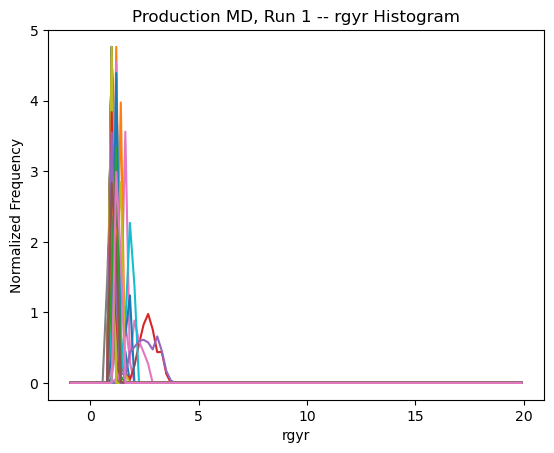

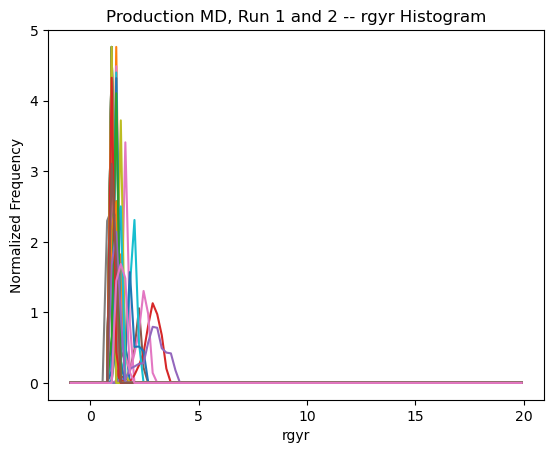

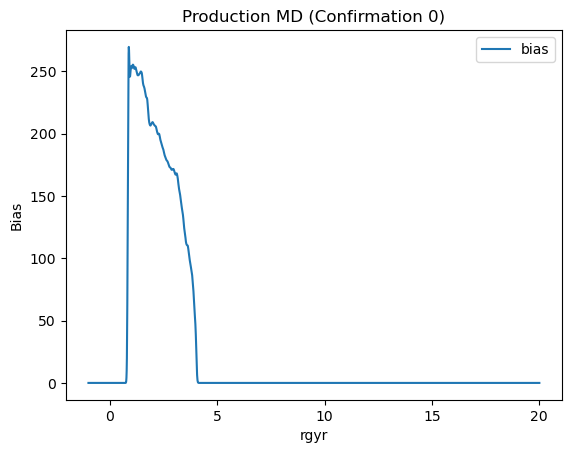

In [60]:
fig, ax = plt.subplots()
colvar_list = ["helix", "beta", "rgyr", "hydro", "salt", "dihcor", "bias"]
for i in range(47):
    data = pd.read_csv(f"../system/simulations/confirmation{i}/COLVAR.{i}.csv", engine="python", skipfooter=3988)

    probability,xedges=np.histogram(data["rgyr"], bins=100,range=[-1, 20],density=True,weights=None)
    xcenters= xedges[:-1] + np.diff(xedges)/2
    ax.plot(xcenters, probability, label=f"rgyr values - confirmation {i}")
    # ax.plot(helix_values, unknown_qty, label="uknown")
    ax.set_xlabel("rgyr")  # Add an x-label to the axes.
    ax.set_ylabel("Normalized Frequency")  # Add a y-label to the axes.
    ax.set_title("Production MD, Run 1 -- rgyr Histogram")
#     ax.legend()

fig, ax = plt.subplots()
for i in range(47):
    data = pd.read_csv(f"../system/simulations/confirmation{i}/COLVAR.{i}.csv")

    probability,xedges=np.histogram(data["rgyr"], bins=100,range=[-1, 20],density=True,weights=None)
    xcenters= xedges[:-1] + np.diff(xedges)/2
    ax.plot(xcenters, probability, label=f"rgyr values - confirmation {i}")
    # ax.plot(helix_values, unknown_qty, label="uknown")
    ax.set_xlabel("rgyr")  # Add an x-label to the axes.
    ax.set_ylabel("Normalized Frequency")  # Add a y-label to the axes.
    ax.set_title("Production MD, Run 1 and 2 -- rgyr Histogram")
#     ax.legend()

data = pd.read_table("../system/simulations/confirmation0/GRID.rgyr", delim_whitespace=True, skiprows=5, header=None)
values = data[0]
bias = data[1]

fig, ax = plt.subplots()
ax.plot(values, bias, label="bias")
ax.set_xlabel(f"rgyr")  # Add an x-label to the axes.
ax.set_ylabel("Bias")  # Add a y-label to the axes.
ax.set_title("Production MD (Confirmation 0)")
ax.legend()

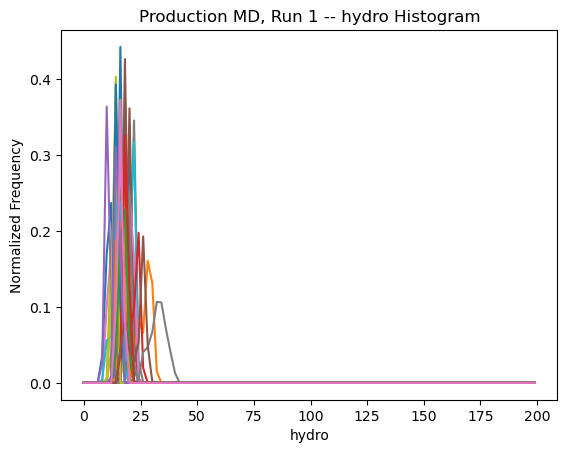

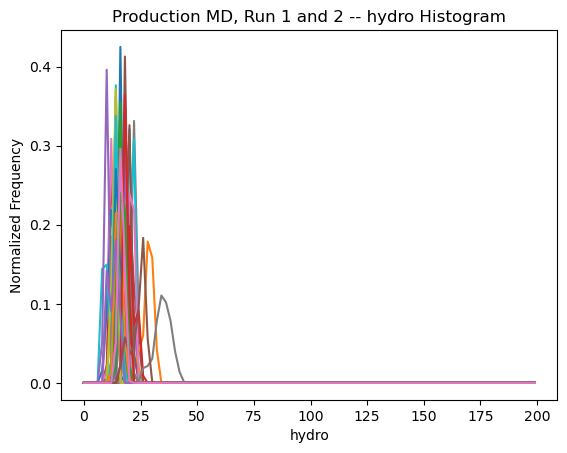

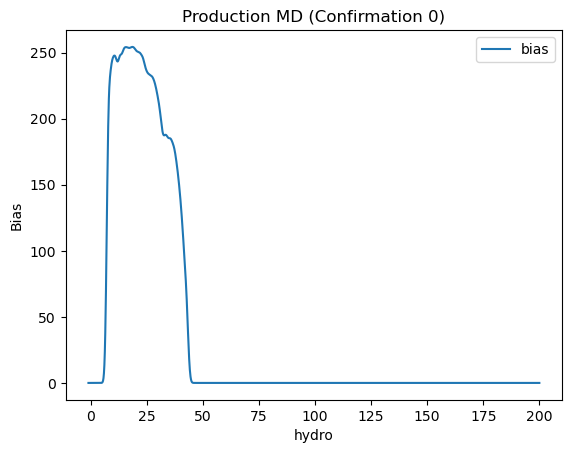

In [61]:
fig, ax = plt.subplots()
colvar_list = ["helix", "beta", "rgyr", "hydro", "salt", "dihcor", "bias"]
for i in range(47):
    data = pd.read_csv(f"../system/simulations/confirmation{i}/COLVAR.{i}.csv", engine="python", skipfooter=3988)

    probability,xedges=np.histogram(data["hydro"], bins=100,range=[-1, 200],density=True,weights=None)
    xcenters= xedges[:-1] + np.diff(xedges)/2
    ax.plot(xcenters, probability, label=f"rgyr values - confirmation {i}")
    # ax.plot(helix_values, unknown_qty, label="uknown")
    ax.set_xlabel("hydro")  # Add an x-label to the axes.
    ax.set_ylabel("Normalized Frequency")  # Add a y-label to the axes.
    ax.set_title("Production MD, Run 1 -- hydro Histogram")
#     ax.legend()

fig, ax = plt.subplots()
for i in range(47):
    data = pd.read_csv(f"../system/simulations/confirmation{i}/COLVAR.{i}.csv")

    probability,xedges=np.histogram(data["hydro"], bins=100,range=[-1, 200],density=True,weights=None)
    xcenters= xedges[:-1] + np.diff(xedges)/2
    ax.plot(xcenters, probability, label=f"rgyr values - confirmation {i}")
    # ax.plot(helix_values, unknown_qty, label="uknown")
    ax.set_xlabel("hydro")  # Add an x-label to the axes.
    ax.set_ylabel("Normalized Frequency")  # Add a y-label to the axes.
    ax.set_title("Production MD, Run 1 and 2 -- hydro Histogram")
#     ax.legend()


data = pd.read_table("../system/simulations/confirmation0/GRID.hydro", delim_whitespace=True, skiprows=5, header=None)
values = data[0]
bias = data[1]

fig, ax = plt.subplots()
ax.plot(values, bias, label="bias")
ax.set_xlabel(f"hydro")  # Add an x-label to the axes.
ax.set_ylabel("Bias")  # Add a y-label to the axes.
ax.set_title("Production MD (Confirmation 0)")
ax.legend()

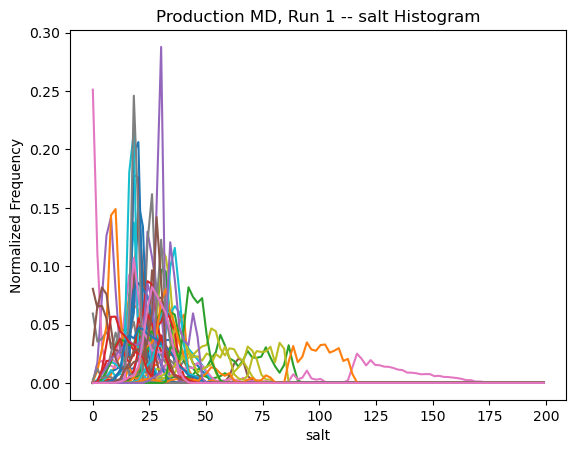

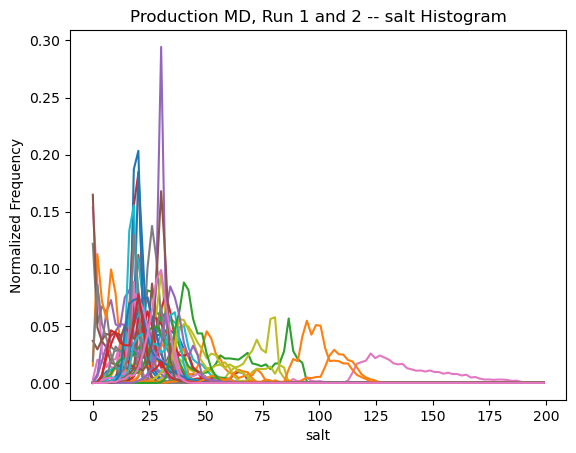

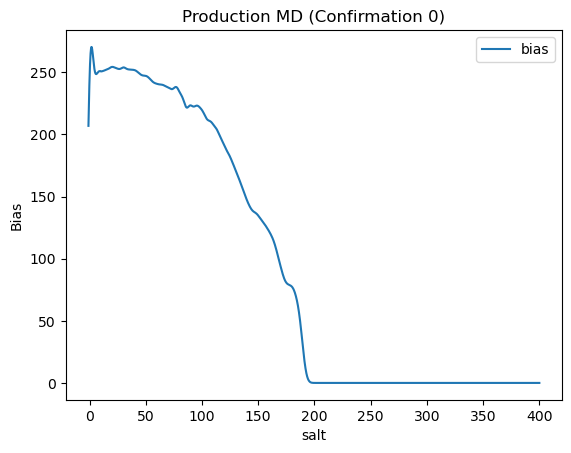

In [62]:
fig, ax = plt.subplots()
colvar_list = ["helix", "beta", "rgyr", "hydro", "salt", "dihcor", "bias"]
for i in range(47):
    data = pd.read_csv(f"../system/simulations/confirmation{i}/COLVAR.{i}.csv", engine="python", skipfooter=3988)

    probability,xedges=np.histogram(data["salt"], bins=100,range=[-1, 200],density=True,weights=None)
    xcenters= xedges[:-1] + np.diff(xedges)/2
    ax.plot(xcenters, probability, label=f"salt values - confirmation {i}")
    # ax.plot(helix_values, unknown_qty, label="uknown")
    ax.set_xlabel("salt")  # Add an x-label to the axes.
    ax.set_ylabel("Normalized Frequency")  # Add a y-label to the axes.
    ax.set_title("Production MD, Run 1 -- salt Histogram")
#     ax.legend()

fig, ax = plt.subplots()
for i in range(47):
    data = pd.read_csv(f"../system/simulations/confirmation{i}/COLVAR.{i}.csv")

    probability,xedges=np.histogram(data["salt"], bins=100,range=[-1, 200],density=True,weights=None)
    xcenters= xedges[:-1] + np.diff(xedges)/2
    ax.plot(xcenters, probability, label=f"salt values - confirmation {i}")
    # ax.plot(helix_values, unknown_qty, label="uknown")
    ax.set_xlabel("salt")  # Add an x-label to the axes.
    ax.set_ylabel("Normalized Frequency")  # Add a y-label to the axes.
    ax.set_title("Production MD, Run 1 and 2 -- salt Histogram")
#     ax.legend()


data = pd.read_table("../system/simulations/confirmation0/GRID.salt", delim_whitespace=True, skiprows=5, header=None)
values = data[0]
bias = data[1]

fig, ax = plt.subplots()
ax.plot(values, bias, label="bias")
ax.set_xlabel(f"salt")  # Add an x-label to the axes.
ax.set_ylabel("Bias")  # Add a y-label to the axes.
ax.set_title("Production MD (Confirmation 0)")
ax.legend()

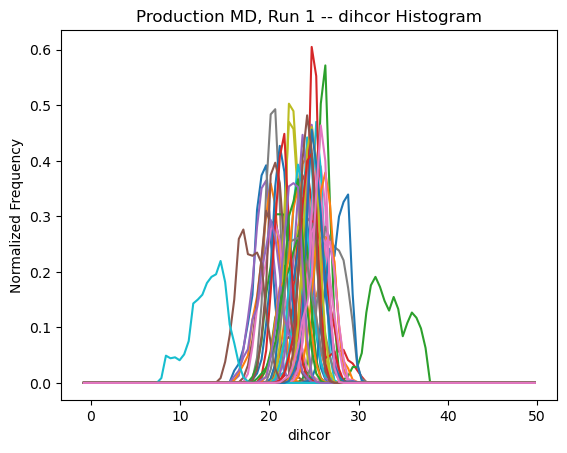

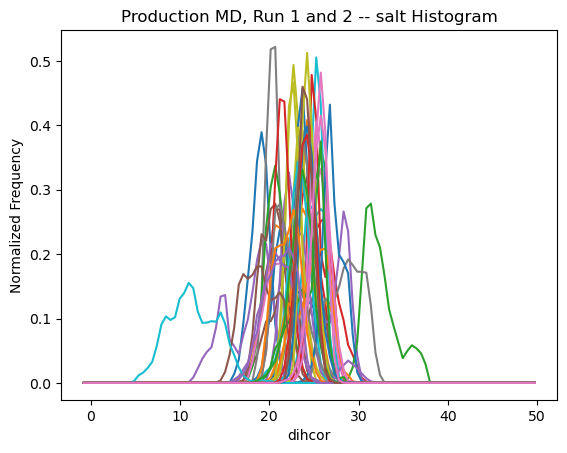

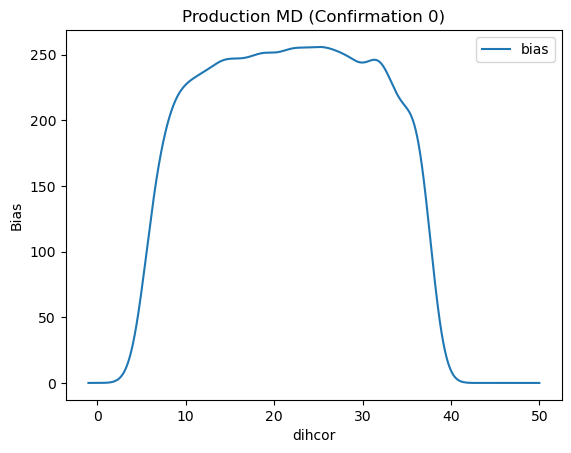

In [64]:
fig, ax = plt.subplots()
colvar_list = ["helix", "beta", "rgyr", "hydro", "salt", "dihcor", "bias"]
for i in range(47):
    data = pd.read_csv(f"../system/simulations/confirmation{i}/COLVAR.{i}.csv", engine="python", skipfooter=3988)

    probability,xedges=np.histogram(data["dihcor"], bins=100,range=[-1, 50],density=True,weights=None)
    xcenters= xedges[:-1] + np.diff(xedges)/2
    ax.plot(xcenters, probability, label=f"dihcor values - confirmation {i}")
    # ax.plot(helix_values, unknown_qty, label="uknown")
    ax.set_xlabel("dihcor")  # Add an x-label to the axes.
    ax.set_ylabel("Normalized Frequency")  # Add a y-label to the axes.
    ax.set_title("Production MD, Run 1 -- dihcor Histogram")
#     ax.legend()

fig, ax = plt.subplots()
for i in range(47):
    data = pd.read_csv(f"../system/simulations/confirmation{i}/COLVAR.{i}.csv")

    probability,xedges=np.histogram(data["dihcor"], bins=100,range=[-1, 50],density=True,weights=None)
    xcenters= xedges[:-1] + np.diff(xedges)/2
    ax.plot(xcenters, probability, label=f"dihcor values - confirmation {i}")
    # ax.plot(helix_values, unknown_qty, label="uknown")
    ax.set_xlabel("dihcor")  # Add an x-label to the axes.
    ax.set_ylabel("Normalized Frequency")  # Add a y-label to the axes.
    ax.set_title("Production MD, Run 1 and 2 -- salt Histogram")
#     ax.legend()


data = pd.read_table("../system/simulations/confirmation0/GRID.dihcor", delim_whitespace=True, skiprows=5, header=None)
values = data[0]
bias = data[1]

fig, ax = plt.subplots()
ax.plot(values, bias, label="bias")
ax.set_xlabel(f"dihcor")  # Add an x-label to the axes.
ax.set_ylabel("Bias")  # Add a y-label to the axes.
ax.set_title("Production MD (Confirmation 0)")
ax.legend()

In [107]:
import os
os.getcwd()

'C:\\Users\\dell\\Projects\\amyloid-beta-research\\AB42_alone\\data_analysis'

## The following graphs visualize the free energy of AB42 generated from the accumulated bias potentials along the six collective variables at different time steps. If the simulation has converged, the free energy at later time steps would stay constant. 

In [14]:
!plumed sum_hills --hills ../system/simulations/confirmation0/HILLS2_beta --outfile beta_fes_ --stride 1600

PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Aug 29 2022 at 12:59:26
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /c/Users/T/miniconda3/conda-bld/plumed_1661770529913/_h_env/lib/plumed
PLUMED: For installed feature, see /c/Users/T/miniconda3/conda-bld/plumed_1661770529913/_h_env/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cit

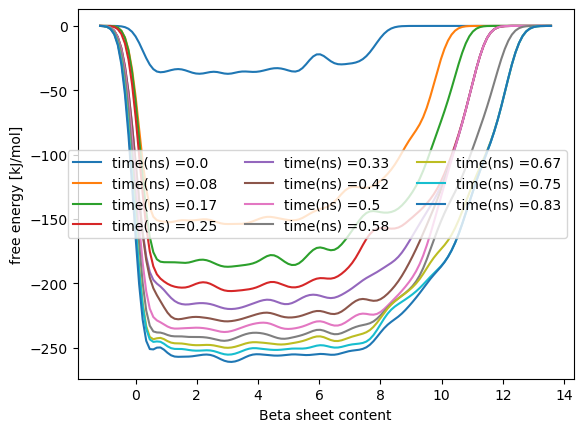

In [18]:
# plot free energy as a function of simulation time
for i in range(0,220, 20):   
 # import fes file into pandas dataset
 file_str = "beta_fes_"+str(i)+".dat"
 data = pd.read_table(file_str, delim_whitespace=True, skiprows=5, header=None)
 # plot fes
 plt.plot(data[0],data[1], label="time(ns) ="+str(round(2*i/10/48, 2))) 
# labels
plt.xlabel("Beta sheet content")
plt.ylabel("free energy [kJ/mol]")
plt.legend(ncol=3)

In [19]:
!plumed sum_hills --hills ../system/simulations/confirmation0/HILLS2_helix --outfile helix_fes_ --stride 1600

PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Aug 29 2022 at 12:59:26
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /c/Users/T/miniconda3/conda-bld/plumed_1661770529913/_h_env/lib/plumed
PLUMED: For installed feature, see /c/Users/T/miniconda3/conda-bld/plumed_1661770529913/_h_env/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cit

PLUMED:   done with this chunk: now with 244800 kernels  
PLUMED: 
PLUMED:   Writing full grid on file helix_fes_152.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 246400 kernels  
PLUMED: 
PLUMED:   Writing full grid on file helix_fes_153.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 248000 kernels  
PLUMED: 
PLUMED:   Writing full grid on file helix_fes_154.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 249600 kernels  
PLUMED: 
PLUMED:   Writing full grid on file helix_fes_155.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 251200 kernels  
PLUMED: 
PLUMED:   Writing full grid on file helix_fes_156.dat 
PLUMED:   reading hills: 
PLUMED:   doing serialread 
PLUMED:   done with this chunk: now with 252800 kernels  
PLUMED: 
PLUMED:   Writing full grid on file helix_fes_157.dat

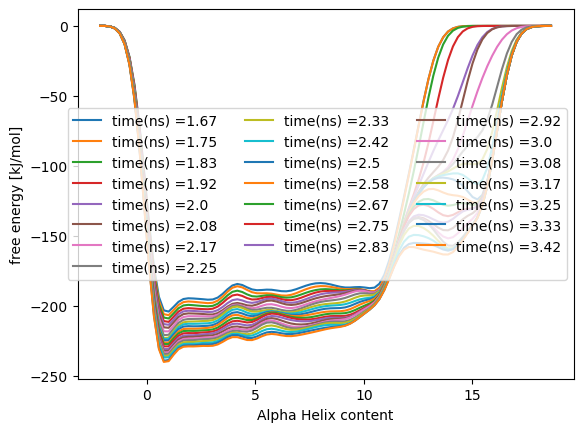

In [130]:
# plot free energy as a function of simulation time
for i in range(0, 220, 10):   
 # import fes file into pandas dataset
 file_str = "helix_fes_"+str(i)+".dat"
 data = pd.read_table(file_str, delim_whitespace=True, skiprows=5, header=None)
 # plot fes
 plt.plot(data[0],data[1], label="time(ns) ="+str(round(4*i/10/48, 2))) 
# labels
plt.xlabel("Alpha Helix content")
plt.ylabel("free energy [kJ/mol]")
plt.legend(ncol=3)

No handles with labels found to put in legend.


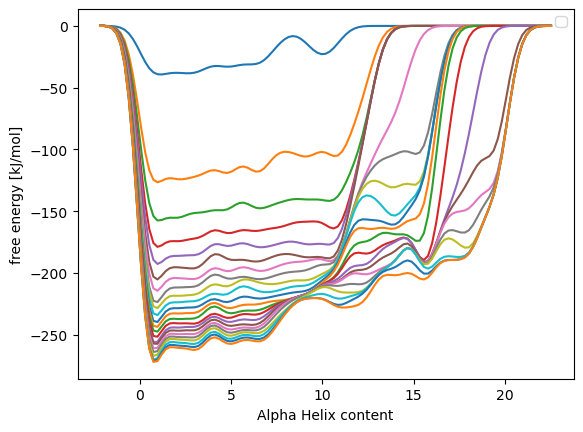

In [21]:
# plot free energy as a function of simulation time
for i in range(0, 220, 10):   
 # import fes file into pandas dataset
 file_str = "helix_fes_"+str(i)+".dat"
 data = pd.read_table(file_str, delim_whitespace=True, skiprows=5, header=None)
 # plot fes
 plt.plot(data[0],data[1]) 
# labels
plt.xlabel("Alpha Helix content")
plt.ylabel("free energy [kJ/mol]")
plt.legend(ncol=3)

In [22]:
!plumed sum_hills --hills ../system/simulations/confirmation0/HILLS2_rgyr --outfile rgyr_fes_ --stride 400

PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Aug 29 2022 at 12:59:26
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /c/Users/T/miniconda3/conda-bld/plumed_1661770529913/_h_env/lib/plumed
PLUMED: For installed feature, see /c/Users/T/miniconda3/conda-bld/plumed_1661770529913/_h_env/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cit

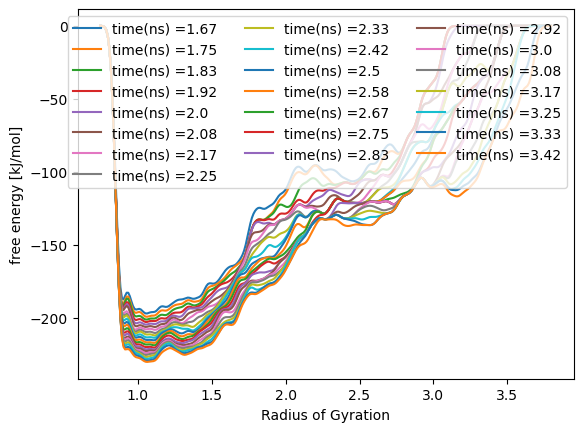

In [132]:
# plot free energy as a function of simulation time
for i in range(200,411, 10):   
 # import fes file into pandas dataset
 file_str = "rgyr_fes_"+str(i)+".dat"
 data = pd.read_table(file_str, delim_whitespace=True, skiprows=5, header=None)
 # plot fes
 plt.plot(data[0],data[1], label="time(ns) ="+str(round(4*i/10/48, 2))) 
# labels
plt.xlabel("Radius of Gyration")
plt.ylabel("free energy [kJ/mol]")
plt.legend(ncol=3)

No handles with labels found to put in legend.


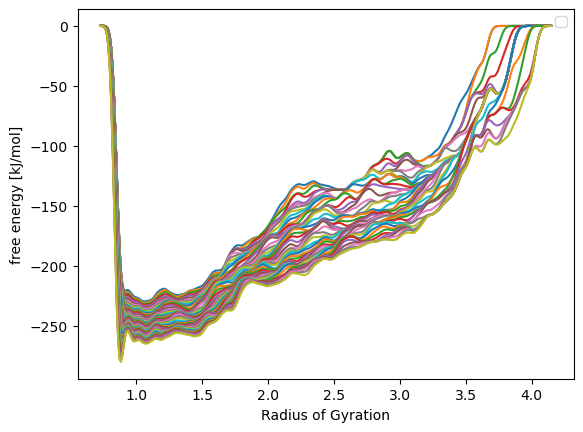

In [28]:
# plot free energy as a function of simulation time
for i in range(400, 881, 10):   
 # import fes file into pandas dataset
 file_str = "rgyr_fes_"+str(i)+".dat"
 data = pd.read_table(file_str, delim_whitespace=True, skiprows=5, header=None)
 # plot fes
 plt.plot(data[0],data[1]) 
# labels
plt.xlabel("Radius of Gyration")
plt.ylabel("free energy [kJ/mol]")
plt.legend(ncol=3)

In [29]:
!plumed sum_hills --hills ../system/simulations/confirmation0/HILLS2_hydro --outfile hydro_fes_ --stride 1600

PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Aug 29 2022 at 12:59:26
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /c/Users/T/miniconda3/conda-bld/plumed_1661770529913/_h_env/lib/plumed
PLUMED: For installed feature, see /c/Users/T/miniconda3/conda-bld/plumed_1661770529913/_h_env/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cit

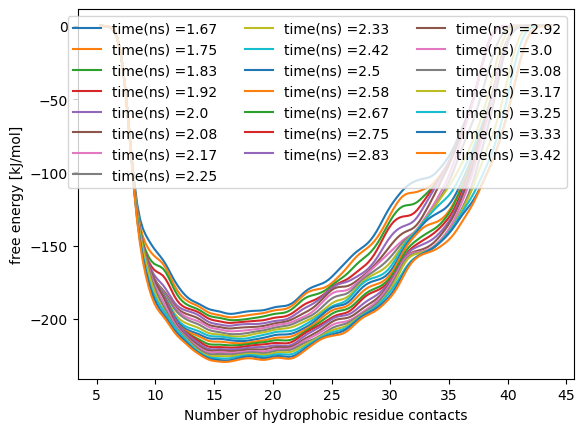

In [5]:
# plot free energy as a function of simulation time
for i in range(200,411, 10):   
 # import fes file into pandas dataset
 file_str = "hydro_fes_"+str(i)+".dat"
 data = pd.read_table(file_str, delim_whitespace=True, skiprows=5, header=None)
 # plot fes
 plt.plot(data[0],data[1], label="time(ns) ="+str(round(4*i/10/48, 2))) 
# labels
plt.xlabel("Number of hydrophobic residue contacts")
plt.ylabel("free energy [kJ/mol]")
plt.legend(ncol=3)

No handles with labels found to put in legend.


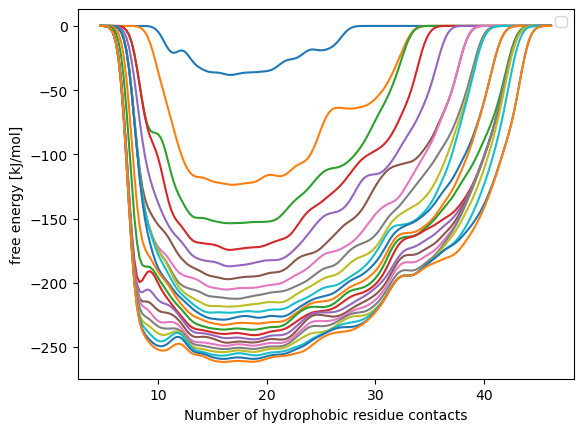

In [30]:
# plot free energy as a function of simulation time
for i in range(0, 220, 10):   
 # import fes file into pandas dataset
 file_str = "hydro_fes_"+str(i)+".dat"
 data = pd.read_table(file_str, delim_whitespace=True, skiprows=5, header=None)
 # plot fes
 plt.plot(data[0],data[1]) 
# labels
plt.xlabel("Number of hydrophobic residue contacts")
plt.ylabel("free energy [kJ/mol]")
plt.legend(ncol=3)

In [31]:
!plumed sum_hills --hills ../system/simulations/confirmation0/HILLS2_salt --outfile salt_fes_ --stride 1600

PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Aug 29 2022 at 12:59:26
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /c/Users/T/miniconda3/conda-bld/plumed_1661770529913/_h_env/lib/plumed
PLUMED: For installed feature, see /c/Users/T/miniconda3/conda-bld/plumed_1661770529913/_h_env/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cit

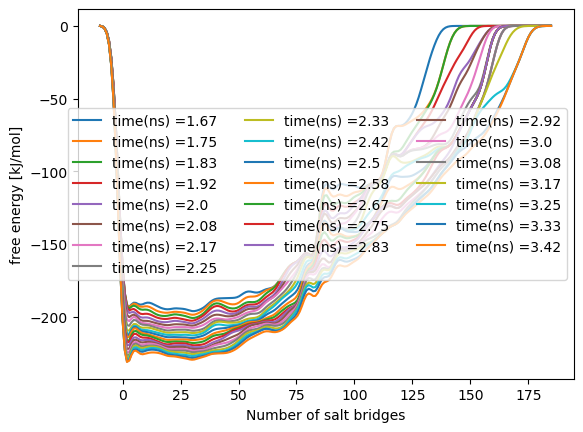

In [136]:
# plot free energy as a function of simulation time
for i in range(200,411, 10):   
 # import fes file into pandas dataset
 file_str = "salt_fes_"+str(i)+".dat"
 data = pd.read_table(file_str, delim_whitespace=True, skiprows=5, header=None)
 # plot fes
 plt.plot(data[0],data[1], label="time(ns) ="+str(round(4*i/10/48, 2))) 
# labels
plt.xlabel("Number of salt bridges")
plt.ylabel("free energy [kJ/mol]")
plt.legend(ncol=3)

No handles with labels found to put in legend.


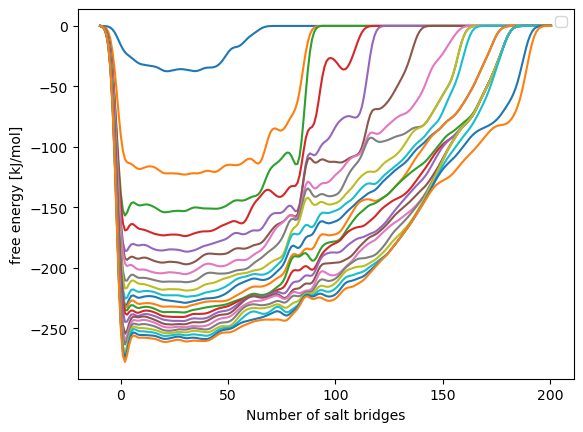

In [32]:
# plot free energy as a function of simulation time
for i in range(0, 220, 10):   
 # import fes file into pandas dataset
 file_str = "salt_fes_"+str(i)+".dat"
 data = pd.read_table(file_str, delim_whitespace=True, skiprows=5, header=None)
 # plot fes
 plt.plot(data[0],data[1]) 
# labels
plt.xlabel("Number of salt bridges")
plt.ylabel("free energy [kJ/mol]")
plt.legend(ncol=3)

In [35]:
!plumed sum_hills --hills ../system/simulations/confirmation0/HILLS2_dihcor --outfile dihcor_fes_ --stride 1600

PLUMED: PLUMED is starting
PLUMED: Version: 2.8.0 (git: Unknown) compiled on Aug 29 2022 at 12:59:26
PLUMED: Please cite these papers when using PLUMED [1][2]
PLUMED: For further information see the PLUMED web page at http://www.plumed.org
PLUMED: Root: /c/Users/T/miniconda3/conda-bld/plumed_1661770529913/_h_env/lib/plumed
PLUMED: For installed feature, see /c/Users/T/miniconda3/conda-bld/plumed_1661770529913/_h_env/lib/plumed/src/config/config.txt
PLUMED: Molecular dynamics engine: 
PLUMED: Precision of reals: 8
PLUMED: Running over 1 node
PLUMED: Number of threads: 1
PLUMED: Cache line size: 512
PLUMED: Number of atoms: 1
PLUMED: File suffix: 
PLUMED: Timestep: 0.000000
PLUMED: KbT has not been set by the MD engine
PLUMED: It should be set by hand where needed
PLUMED: Relevant bibliography:
PLUMED:   [1] The PLUMED consortium, Nat. Methods 16, 670 (2019)
PLUMED:   [2] Tribello, Bonomi, Branduardi, Camilloni, and Bussi, Comput. Phys. Commun. 185, 604 (2014)
PLUMED: Please read and cit

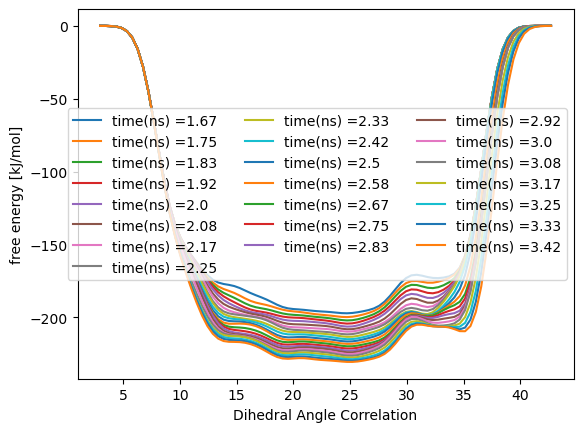

In [138]:
# plot free energy as a function of simulation time
for i in range(200,411, 10):   
 # import fes file into pandas dataset
 file_str = "dihcor_fes_"+str(i)+".dat"
 data = pd.read_table(file_str, delim_whitespace=True, skiprows=5, header=None)
 # plot fes
 plt.plot(data[0],data[1], label="time(ns) ="+str(round(4*i/10/48, 2))) 
# labels
plt.xlabel("Dihedral Angle Correlation")
plt.ylabel("free energy [kJ/mol]")
plt.legend(ncol=3)

No handles with labels found to put in legend.


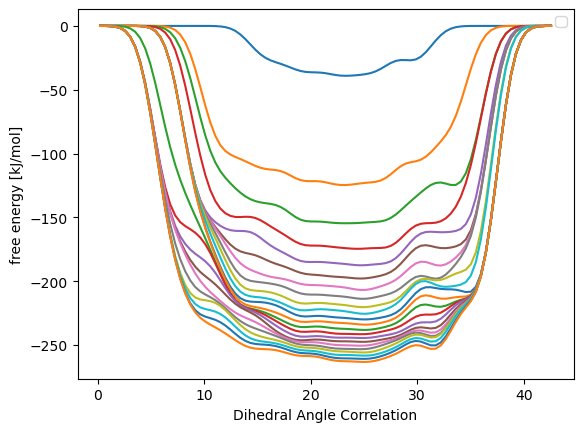

In [36]:
# plot free energy as a function of simulation time
for i in range(0,220, 10):   
 # import fes file into pandas dataset
 file_str = "dihcor_fes_"+str(i)+".dat"
 data = pd.read_table(file_str, delim_whitespace=True, skiprows=5, header=None)
 # plot fes
 plt.plot(data[0],data[1]) 
# labels
plt.xlabel("Dihedral Angle Correlation")
plt.ylabel("free energy [kJ/mol]")
plt.legend(ncol=3)

## The fact that the free energy of none of the collective variables has converged implies that the system needs to be simulated for longer

# Analysis of Metainference Data

In [17]:
data = pd.read_table(f"../system/simulations/confirmation0/STATS.0", delim_whitespace=True, skiprows=1, header=None)

In [19]:
column_headings = get_column_headings(f"../system/simulations/confirmation0/STATS.0")
data.columns = column_headings

In [22]:
def plot_data(x, y, plot_label = "plot label", xlabel = "X axis Label", ylabel = "Y Label", title = "Graph Title"):
    fig, ax = plt.subplots()
    ax.plot(x, y, label=plot_label)
    ax.set_xlabel(xlabel)  # Add an x-label to the axes.
    ax.set_ylabel(ylabel)  # Add a y-label to the axes.
    ax.set_title(title)
    ax.legend()

In [23]:
data

,time,ens.cs.ha-0-2,ens.cs.ha-0-3,ens.cs.ha-0-4,ens.cs.ha-0-5,ens.cs.ha-0-7,ens.cs.ha-0-8,ens.cs.ha-0-10,ens.cs.ha-0-11,ens.cs.ha-0-12,...,ens.cs.co-0-36,ens.cs.co-0-37,ens.cs.co-0-38,ens.cs.co-0-39,ens.cs.co-0-40,ens.cs.co-0-41,stat.sqdevsum,stat.corr,stat.slope,stat.intercept
0,0.0,4.366859,4.330540,4.508636,4.394741,4.504070,4.439125,4.507722,4.266736,3.964854,...,176.124764,174.489065,174.255632,175.619139,175.750884,175.251330,196.807306,0.999892,1.002956,0.028570
1,1.0,4.296234,4.262180,4.572574,4.422109,4.604320,4.378045,4.534049,4.289134,4.020497,...,176.330889,174.613225,173.923962,175.583307,175.798347,175.315512,26.171065,0.999986,1.000912,0.036064
2,2.0,4.373026,4.078850,4.644909,4.371410,4.649399,4.399997,4.590927,4.301446,4.019782,...,176.551501,174.661641,173.779437,175.645180,175.920500,175.205851,9.045391,0.999995,1.000611,0.007294
3,3.0,4.375807,4.091991,4.640203,4.372889,4.675268,4.415548,4.566437,4.320691,4.004645,...,176.584382,174.693342,173.753631,175.590546,175.884232,175.188697,7.522967,0.999996,1.000583,-0.000782
4,4.0,4.370478,4.182775,4.596411,4.411700,4.642222,4.409440,4.550951,4.317253,4.005033,...,176.629873,174.666975,173.797622,175.648626,175.926732,175.265176,7.146978,0.999996,1.000593,-0.002026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3419,3419.0,4.350140,4.142896,4.553513,4.329353,4.676581,4.441489,4.511728,4.278488,4.007826,...,176.680922,174.829849,173.804192,175.724707,175.819189,175.062848,9.142603,0.999995,1.000551,-0.008189
3420,3420.0,4.280478,4.120905,4.547926,4.375545,4.666139,4.402366,4.529756,4.323607,3.988594,...,176.680148,174.683602,173.769292,175.550315,175.880943,175.201607,6.945241,0.999996,1.000545,-0.007123
3421,3421.0,4.297620,4.159171,4.550746,4.324705,4.672268,4.477072,4.555048,4.311689,3.983731,...,176.572148,174.691398,173.740963,175.589158,175.918553,175.145151,8.598794,0.999995,1.000802,-0.009842
3422,3422.0,4.333399,4.144482,4.623367,4.351922,4.657146,4.468399,4.506681,4.284246,4.009014,...,176.723577,174.674490,173.815807,175.696180,176.023607,175.096046,7.638147,0.999996,1.000721,-0.010626


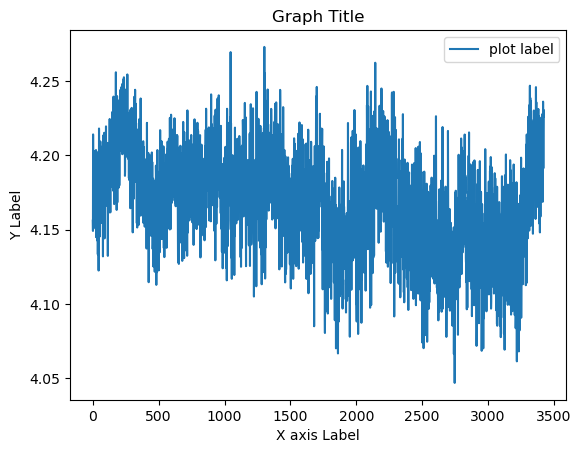

In [25]:
plot_data(data["time"], data["ens.cs.ha-0-41"])